In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")
df = pd.read_csv("../data/processed/model_dataset.csv")

In [3]:
# Check for statistical information
df.info
df.tail(50)

,customer_id,signup_date,age,province,segment,acquisition_channel,plan_type,contract_type,price_per_month,status,...,days_late_max,failed_payment_sum,amount_paid_mean,ticket_count,avg_satisfaction_score,avg_resolution_time_hours,cancelled,no_usage_2mo,failed_payments_3mo,churn
9950,9951,2020-06-01,38,MB,Enterprise,Sales Team,Basic,Annual,20,Active,...,10,2,18.333333,NaN,NaN,NaN,0,0,0,0
9951,9952,2020-08-15,19,NB,Individual,Sales Team,Premium,Monthly,70,Active,...,11,0,70.000000,2.0,2.500000,23.596822,0,0,0,0
9952,9953,2021-10-23,71,SK,Small Business,Organic,Basic,Annual,20,Active,...,6,2,18.333333,1.0,1.000000,40.426002,0,0,0,0
9953,9954,2021-10-02,44,SK,Small Business,Paid Ads,Premium,Monthly,70,Active,...,6,1,67.083333,NaN,NaN,NaN,0,0,0,0
9954,9955,2020-05-07,55,QC,Enterprise,Organic,Standard,Monthly,40,Active,...,7,2,36.666667,NaN,NaN,NaN,0,0,0,0
9955,9956,2020-05-23,43,AB,Enterprise,Organic,Premium,Monthly,70,Active,...,8,0,70.000000,NaN,NaN,NaN,0,0,0,0
9956,9957,2020-04-06,55,QC,Small Business,Organic,Premium,Monthly,70,Active,...,10,0,70.000000,2.0,4.500000,27.673101,0,0,0,0
9957,9958,2021-10-22,63,MB,Individual,Paid Ads,Premium,Monthly,70,Active,...,5,5,55.416667,3.0,2.333333,27.355452,0,0,0,0
9958,9959,2020-07-21,42,NB,Enterprise,Sales Team,Basic,Monthly,20,Active,...,10,2,18.333333,3.0,1.666667,31.111249,0,0,0,0
9959,9960,2022-01-09,28,ON,Enterprise,Organic,Standard,Annual,40,Active,...,7,2,36.666667,NaN,NaN,NaN,0,0,0,0


0.0062


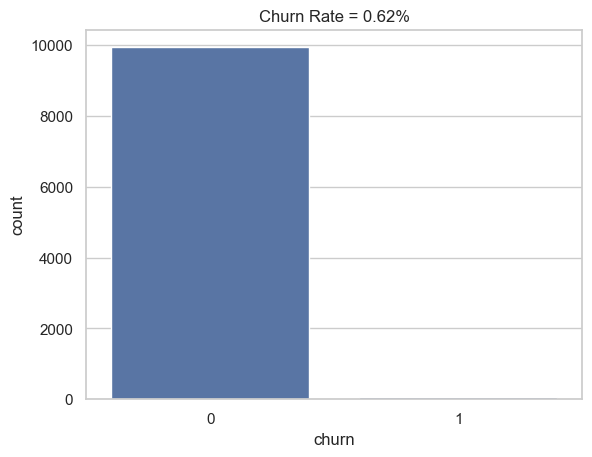

In [4]:
# let's get the churn rate 
churn_rate = df["churn"].mean()
print(churn_rate)

# Visualize  
sns.countplot(x="churn",data=df)
plt.title(f"Churn Rate = {churn_rate:.2%}")
plt.show()

In [5]:
# Categorical Feature Analysis- Segment vs Churn
pd.crosstab(df["segment"],df["churn"], normalize="index")

churn,0,1
segment,,
Enterprise,0.992147,0.007853
Individual,0.994689,0.005311
Small Business,0.994545,0.005455


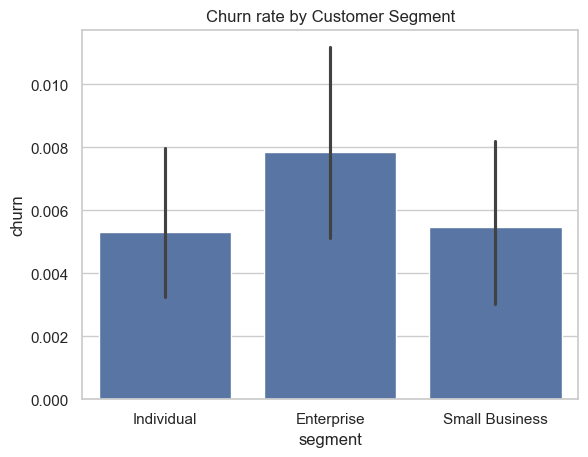

In [6]:
# Visualize
sns.barplot(
    x = "segment",
    y = "churn",
    data = df,
    estimator = np.mean
)
plt.title("Churn rate by Customer Segment")
plt.show()

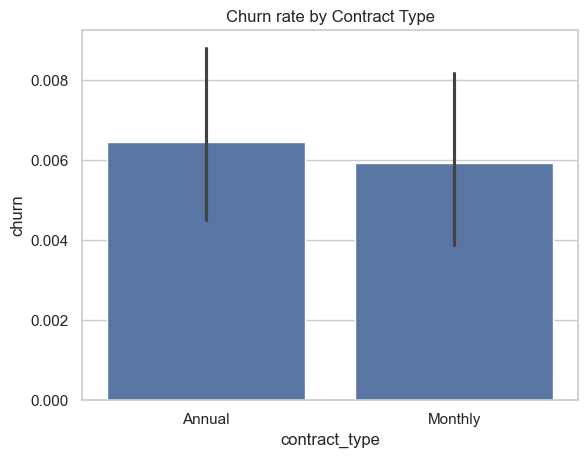

In [8]:
# Let's compare contract type vs churn rate
sns.barplot(
    x = "contract_type",
    y = "churn",
    data = df)
plt.title("Churn rate by Contract Type")
plt.show()

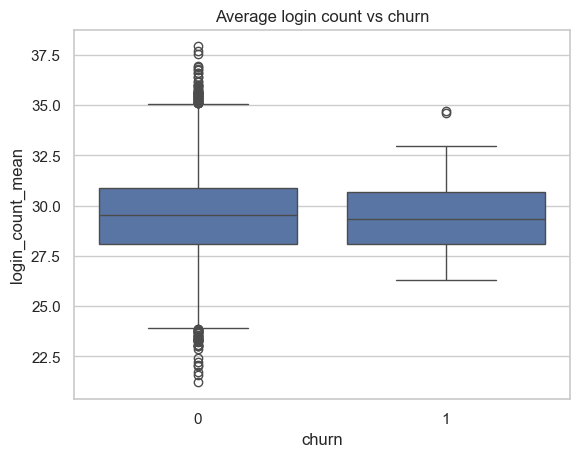

In [10]:
# User behaviour vs Churn (Core insight)
sns.boxplot(
    x = "churn",
    y = "login_count_mean",
    data = df
)
plt.title("Average login count vs churn")
plt.show()

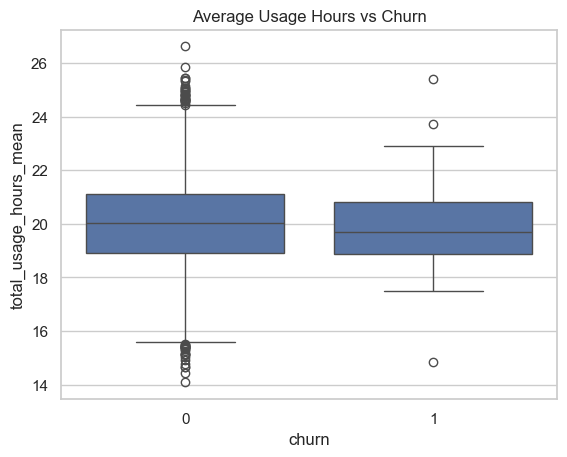

In [11]:
# Let's see the distribution of age vs churn
sns.boxplot(
    x="churn",
    y="total_usage_hours_mean",
    data=df
)
plt.title("Average Usage Hours vs Churn")
plt.show()


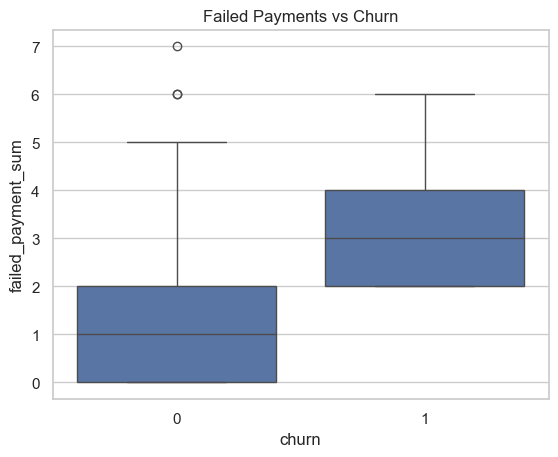

In [12]:
# Billing and Support Signals
sns.boxplot(
    x="churn",
    y="failed_payment_sum",
    data=df
)
plt.title("Failed Payments vs Churn")
plt.show()


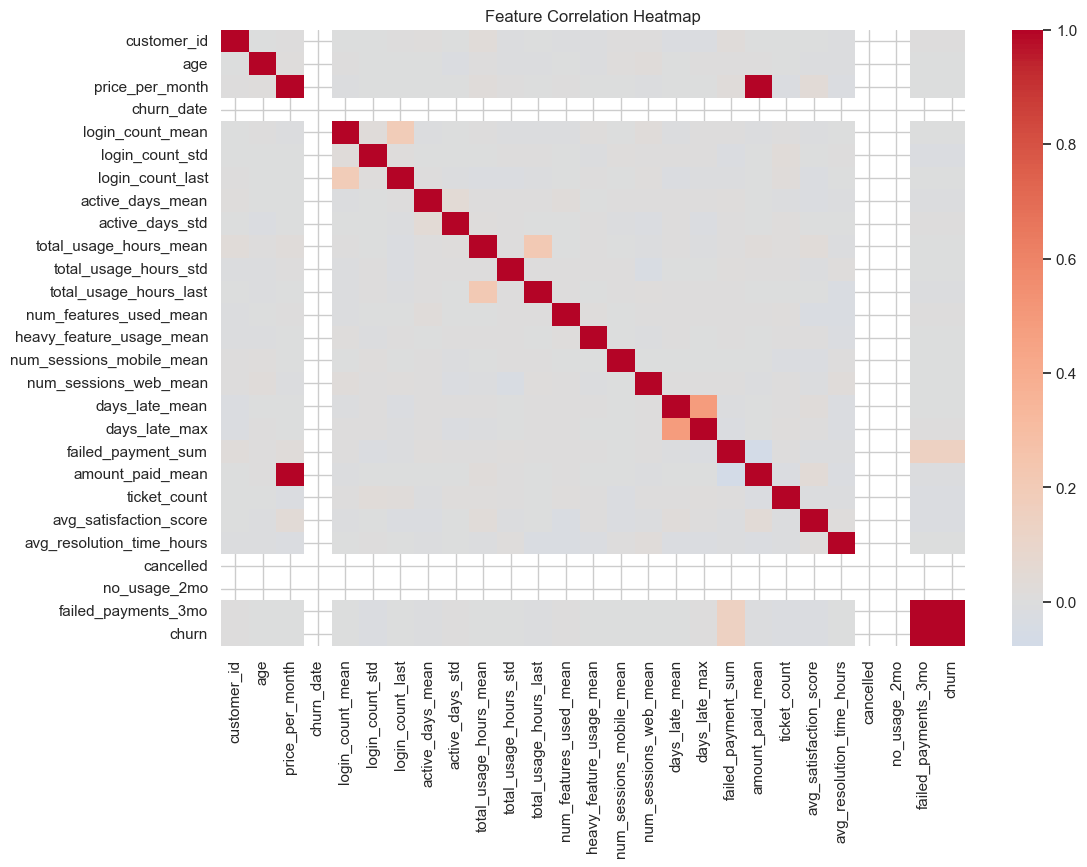

In [13]:
# Correlation Check
num_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(12, 8))
sns.heatmap(
    df[num_cols].corr(),
    cmap="coolwarm",
    center=0
)
plt.title("Feature Correlation Heatmap")
plt.show()
